


## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Exploratary Data Analysis of Lending Club Dataset:

### Data Cleaning and Data Preparation of Lending Club Dataset

### importing the required libraries

In [1]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to display all columns
pd.set_option('display.max_columns',200)

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dateset
data=pd.read_csv("loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,735,739,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,714,710,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,740,744,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,499,0,0.0,NaN,1,Individual,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,1

In [3]:
#understanding the data
data.shape

(39786, 150)

In [4]:
data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 150, dtype: object

In [5]:
data['loan_status'].value_counts()

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

In [6]:
34116/(34116+5670)

0.8574875584376414

# Null value Treatment

In [7]:
# creating a dataframe to check null percentage
null=pd.DataFrame()
null['percentage null']=(data.isnull().sum()/len(data)*100)
null.head()

,percentage null
id,100.0
member_id,100.0
loan_amnt,0.0
funded_amnt,0.0
funded_amnt_inv,0.0


In [8]:
# removing features with more than 50% null percentage
null_val=list(null[null['percentage null']>50].index)

In [9]:
#list of features with more than 50% missing value
null_val

['id',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 

In [10]:
data=data.drop(null_val,axis=1)
data.shape

(39786, 58)

# Removing other irrelevant columns

In [11]:
# first removing data with no variance i.e. just one unique values
uniq=pd.DataFrame()
uniq['values']=data.nunique()
uniq_val=list(uniq[uniq['values']<2].index)
uniq_val

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag']

In [12]:
data['pymnt_plan'].value_counts()

n    39786
Name: pymnt_plan, dtype: int64

In [13]:
data=data.drop(uniq_val,axis=1)
data.shape

(39786, 46)

### Removing features that has future/changing info that isn't useful for our mode

In [14]:
#these features are little to no use for our model
unwanted=['url','desc','last_pymnt_d','last_pymnt_amnt','last_fico_range_high','last_fico_range_low','debt_settlement_flag',
          'last_credit_pull_d','zip_code','funded_amnt','funded_amnt_inv','sub_grade','emp_title','issue_d',
          'total_pymnt','total_rec_int','total_rec_late_fee','recoveries', 'collection_recovery_fee','total_pymnt_inv',
          'total_rec_prncp','earliest_cr_line']

In [15]:
data=data.drop(unwanted,axis=1)

In [16]:
data.shape

(39786, 24)

In [17]:
# Making fico_average columns using fico_range_low and fico_range_high then dropping them

data['fico_average']=(data['fico_range_low']+data['fico_range_high'])/2
data=data.drop(['fico_range_low','fico_range_high'],axis=1)

data.shape

(39786, 23)

In [18]:
data['revol_util'].head(5)

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [19]:
#removing the percentage symbol and converting into a numeric value
data['revol_util']=data['revol_util'].str.rstrip('%').astype('float')
data['int_rate']=data['int_rate'].str.rstrip('%').astype('float')

In [20]:
data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1078
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
fico_average               0
dtype: int64

In [21]:
#checking relation betweeen our target and address
ct=pd.crosstab(data['addr_state'],data['loan_status'])
ct.head(10)

loan_status,Charged Off,Fully Paid
addr_state,,
AK,16,65
AL,54,398
AR,28,218
AZ,125,757
CA,1131,5974
CO,98,694
CT,94,660
DC,15,199
DE,12,102


In [22]:
# Removing addr_state beacuse it has little significance and will add 49 features while creating dummies
data=data.drop('addr_state',axis=1)

In [23]:
data.shape

(39786, 22)

In [24]:
#purpose and title give the same info so have to drop one which is less burden to our model
data['purpose'].value_counts()

debt_consolidation    18676
credit_card            5137
other                  4001
home_improvement       2985
major_purchase         2188
small_business         1831
car                    1551
wedding                 948
medical                 695
moving                  583
house                   382
vacation                381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [25]:
data['title'].value_counts()

Debt Consolidation                         2191
Debt Consolidation Loan                    1733
Personal Loan                               661
Consolidation                               517
debt consolidation                          508
                                           ... 
Remodeled Basement                            1
My first (and last!) debt consolidation       1
Pregnant and need a foundation!               1
Expanding an Online Business                  1
American Union                                1
Name: title, Length: 19633, dtype: int64

In [26]:
#removing title
data=data.drop('title',axis=1)
data.shape

(39786, 21)

### Filling the remaining missing values

In [27]:
null=pd.DataFrame()
null['percentage null']=(data.isnull().sum()/len(data)*100)
null[null['percentage null']>0]

,percentage null
emp_length,2.709496
revol_util,0.125672
pub_rec_bankruptcies,1.751873


#### 1- Filling revol_util columns

In [28]:
data['revol_util'].describe()

count    39736.000000
mean        48.858123
std         28.336631
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

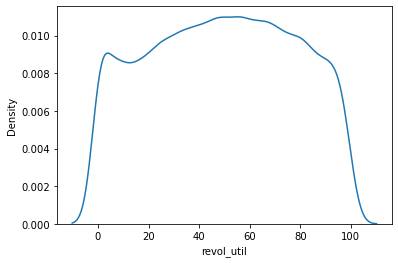

In [29]:
sns.distplot(data['revol_util'],hist=False)
plt.show()

In [30]:
data['revol_util'].value_counts().head()

0.0     980
0.2      63
63.0     62
40.7     59
0.1      58
Name: revol_util, dtype: int64

In [31]:
## filling with mode
data['revol_util'].fillna(0,inplace=True)

#### 2- filling  pub_rec_bankruptcies column

In [32]:
data['pub_rec_bankruptcies'].value_counts()

0.0    37404
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [33]:
#filling Na with majority category

data['pub_rec_bankruptcies'].fillna(0,inplace=True)

#### 3- filling emp_length null value

In [34]:
ct=pd.crosstab(data['emp_length'],data['loan_status'])
ct['percentage charged off']=ct['Charged Off']/(ct['Charged Off']+ct['Fully Paid'])*100
ct

loan_status,Charged Off,Fully Paid,percentage charged off
emp_length,,,
1 year,460,2787,14.166923
10+ years,1348,7551,15.147769
2 years,571,3823,12.994993
3 years,558,3540,13.616398
4 years,466,2978,13.530778
5 years,459,2827,13.968351
6 years,309,1922,13.850291
7 years,263,1512,14.816901
8 years,206,1279,13.872054


In [35]:
#removing all the rows with null values for emp_length
data=data.dropna(axis=0)

In [36]:
#checking for null values again one last time
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
fico_average            0
dtype: int64

In [37]:
#checking the shape of data
data.shape

(38708, 21)

In [38]:
#saving the cleaned data to new csv
#data.to_csv('cleaned_data.csv',index=False)

In [39]:
df=pd.read_csv("cleaned_data.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,0.0,737.0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,0.0,742.0
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,0.0,737.0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21.0,37,0.0,692.0
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0,0,15,0,27783,53.9,38,0.0,697.0


In [40]:
df['loan_status'].value_counts()

Fully Paid     33268
Charged Off     5440
Name: loan_status, dtype: int64

In [41]:
df.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    63438.852340
Fully Paid     70628.832279
Name: annual_inc, dtype: float64

In [42]:
ct=pd.crosstab(df['home_ownership'],df['loan_status'])
ct.columns

Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')

In [43]:
ct['percentage']=ct['Charged Off']/(ct['Charged Off']+ct['Fully Paid'])*100
ct

loan_status,Charged Off,Fully Paid,percentage
home_ownership,,,
MORTGAGE,2268,14987,13.144016
NONE,0,3,0.000000
OTHER,18,80,18.367347
OWN,402,2443,14.130053
RENT,2752,15755,14.870049


In [44]:
ct=pd.crosstab(df['pub_rec_bankruptcies'],df['loan_status'])
ct['percentage']=ct['Charged Off']/(ct['Charged Off']+ct['Fully Paid'])*100
ct

loan_status,Charged Off,Fully Paid,percentage
pub_rec_bankruptcies,,,
0.0,5099,32035,13.731351
1.0,339,1228,21.633695
2.0,2,5,28.571429


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
## EDA
    
<a id='the_destination'></a>


In [45]:
df = pd.read_csv("cleaned_data.csv")
#df.drop('Unnamed: 0', axis =1, inplace=True)
# as this column doesent contribute to analysis 
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,0.0,737.0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,0.0,742.0
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,0.0,737.0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21.0,37,0.0,692.0
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Fully Paid,other,17.94,0,0,15,0,27783,53.9,38,0.0,697.0


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
## Shape of the Dataset
    
<a id='the_destination'></a>


In [46]:
df.shape

print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  38708 
no. of columns:  21


### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  
    
## Data types of data features
    
<a id='the_destination'></a>


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38708 entries, 0 to 38707
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38708 non-null  int64  
 1   term                  38708 non-null  object 
 2   int_rate              38708 non-null  float64
 3   installment           38708 non-null  float64
 4   grade                 38708 non-null  object 
 5   emp_length            38708 non-null  object 
 6   home_ownership        38708 non-null  object 
 7   annual_inc            38708 non-null  float64
 8   verification_status   38708 non-null  object 
 9   loan_status           38708 non-null  object 
 10  purpose               38708 non-null  object 
 11  dti                   38708 non-null  float64
 12  delinq_2yrs           38708 non-null  int64  
 13  inq_last_6mths        38708 non-null  int64  
 14  open_acc              38708 non-null  int64  
 15  pub_rec            

In [48]:
# Are there any missing values ?
df.isnull().sum().sort_values(ascending=False)

fico_average            0
loan_status             0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
purpose                 0
pub_rec_bankruptcies    0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
loan_amnt               0
dtype: int64

In [49]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37134
1.0     1567
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
df['pub_rec'].value_counts()

0    36710
1     1939
2       49
3        8
4        2
Name: pub_rec, dtype: int64

In [51]:
df['delinq_2yrs'].value_counts()

0     34492
1      3233
2       668
3       215
4        61
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

After looking at the values of features pub_rec_bankruptcies,pub_rec,delinq_2yrs it has only two states.so it is converted into object

In [52]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('object')
df['pub_rec'] = df['pub_rec'].astype('object')
df['delinq_2yrs'] = df['delinq_2yrs'].astype('object')

###### Inference : There is no missing values to be treated.

In [53]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
count,38708.000000,38708.000000,38708.00000,3.870800e+04,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000,38708.000000
mean,11303.474088,12.059264,326.93718,6.961836e+04,13.328100,0.869975,9.317686,13468.208407,48.966502,22.124341,716.691924
std,7470.250461,3.719497,209.19873,6.422244e+04,6.666607,1.069649,4.394644,15924.871680,28.344487,11.392885,35.674940
min,500.000000,5.420000,15.69000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,627.000000
25%,5500.000000,9.320000,168.45000,4.149600e+04,8.210000,0.000000,6.000000,3746.750000,25.600000,14.000000,687.000000
50%,10000.000000,11.860000,283.18000,6.000000e+04,13.420000,1.000000,9.000000,8950.000000,49.500000,20.000000,712.000000
75%,15000.000000,14.590000,434.75000,8.320000e+04,18.590000,1.000000,12.000000,17158.250000,72.500000,29.000000,742.000000
max,35000.000000,24.590000,1305.19000,6.000000e+06,29.990000,8.000000,44.000000,149588.000000,99.900000,90.000000,827.000000


###### Inferences

1) The Loan amount column min is 500 and max is 35000, while the mean is 11303 and SD is 7470 , the distribution is not normal and is skewed towards left . the bank has more customers with smaller loan amounts. 

2) The Installment column min is 15.69 and max is 1305, while the mean is 326 and SD is 209 , the distribution is not normal and is skewed towards left . the bank has more customers with smaller loan amounts. this shows similar trend as loan amount

3) The dti ratio column min is 0 amd max is 30, the mean is 13.32 with SD of 6.66 is nearly normal distribution 

4) The delinq_2yrs column with min 0 and max of 11 is highly skewed 

In [54]:
#selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'fico_average'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Univariate analysis

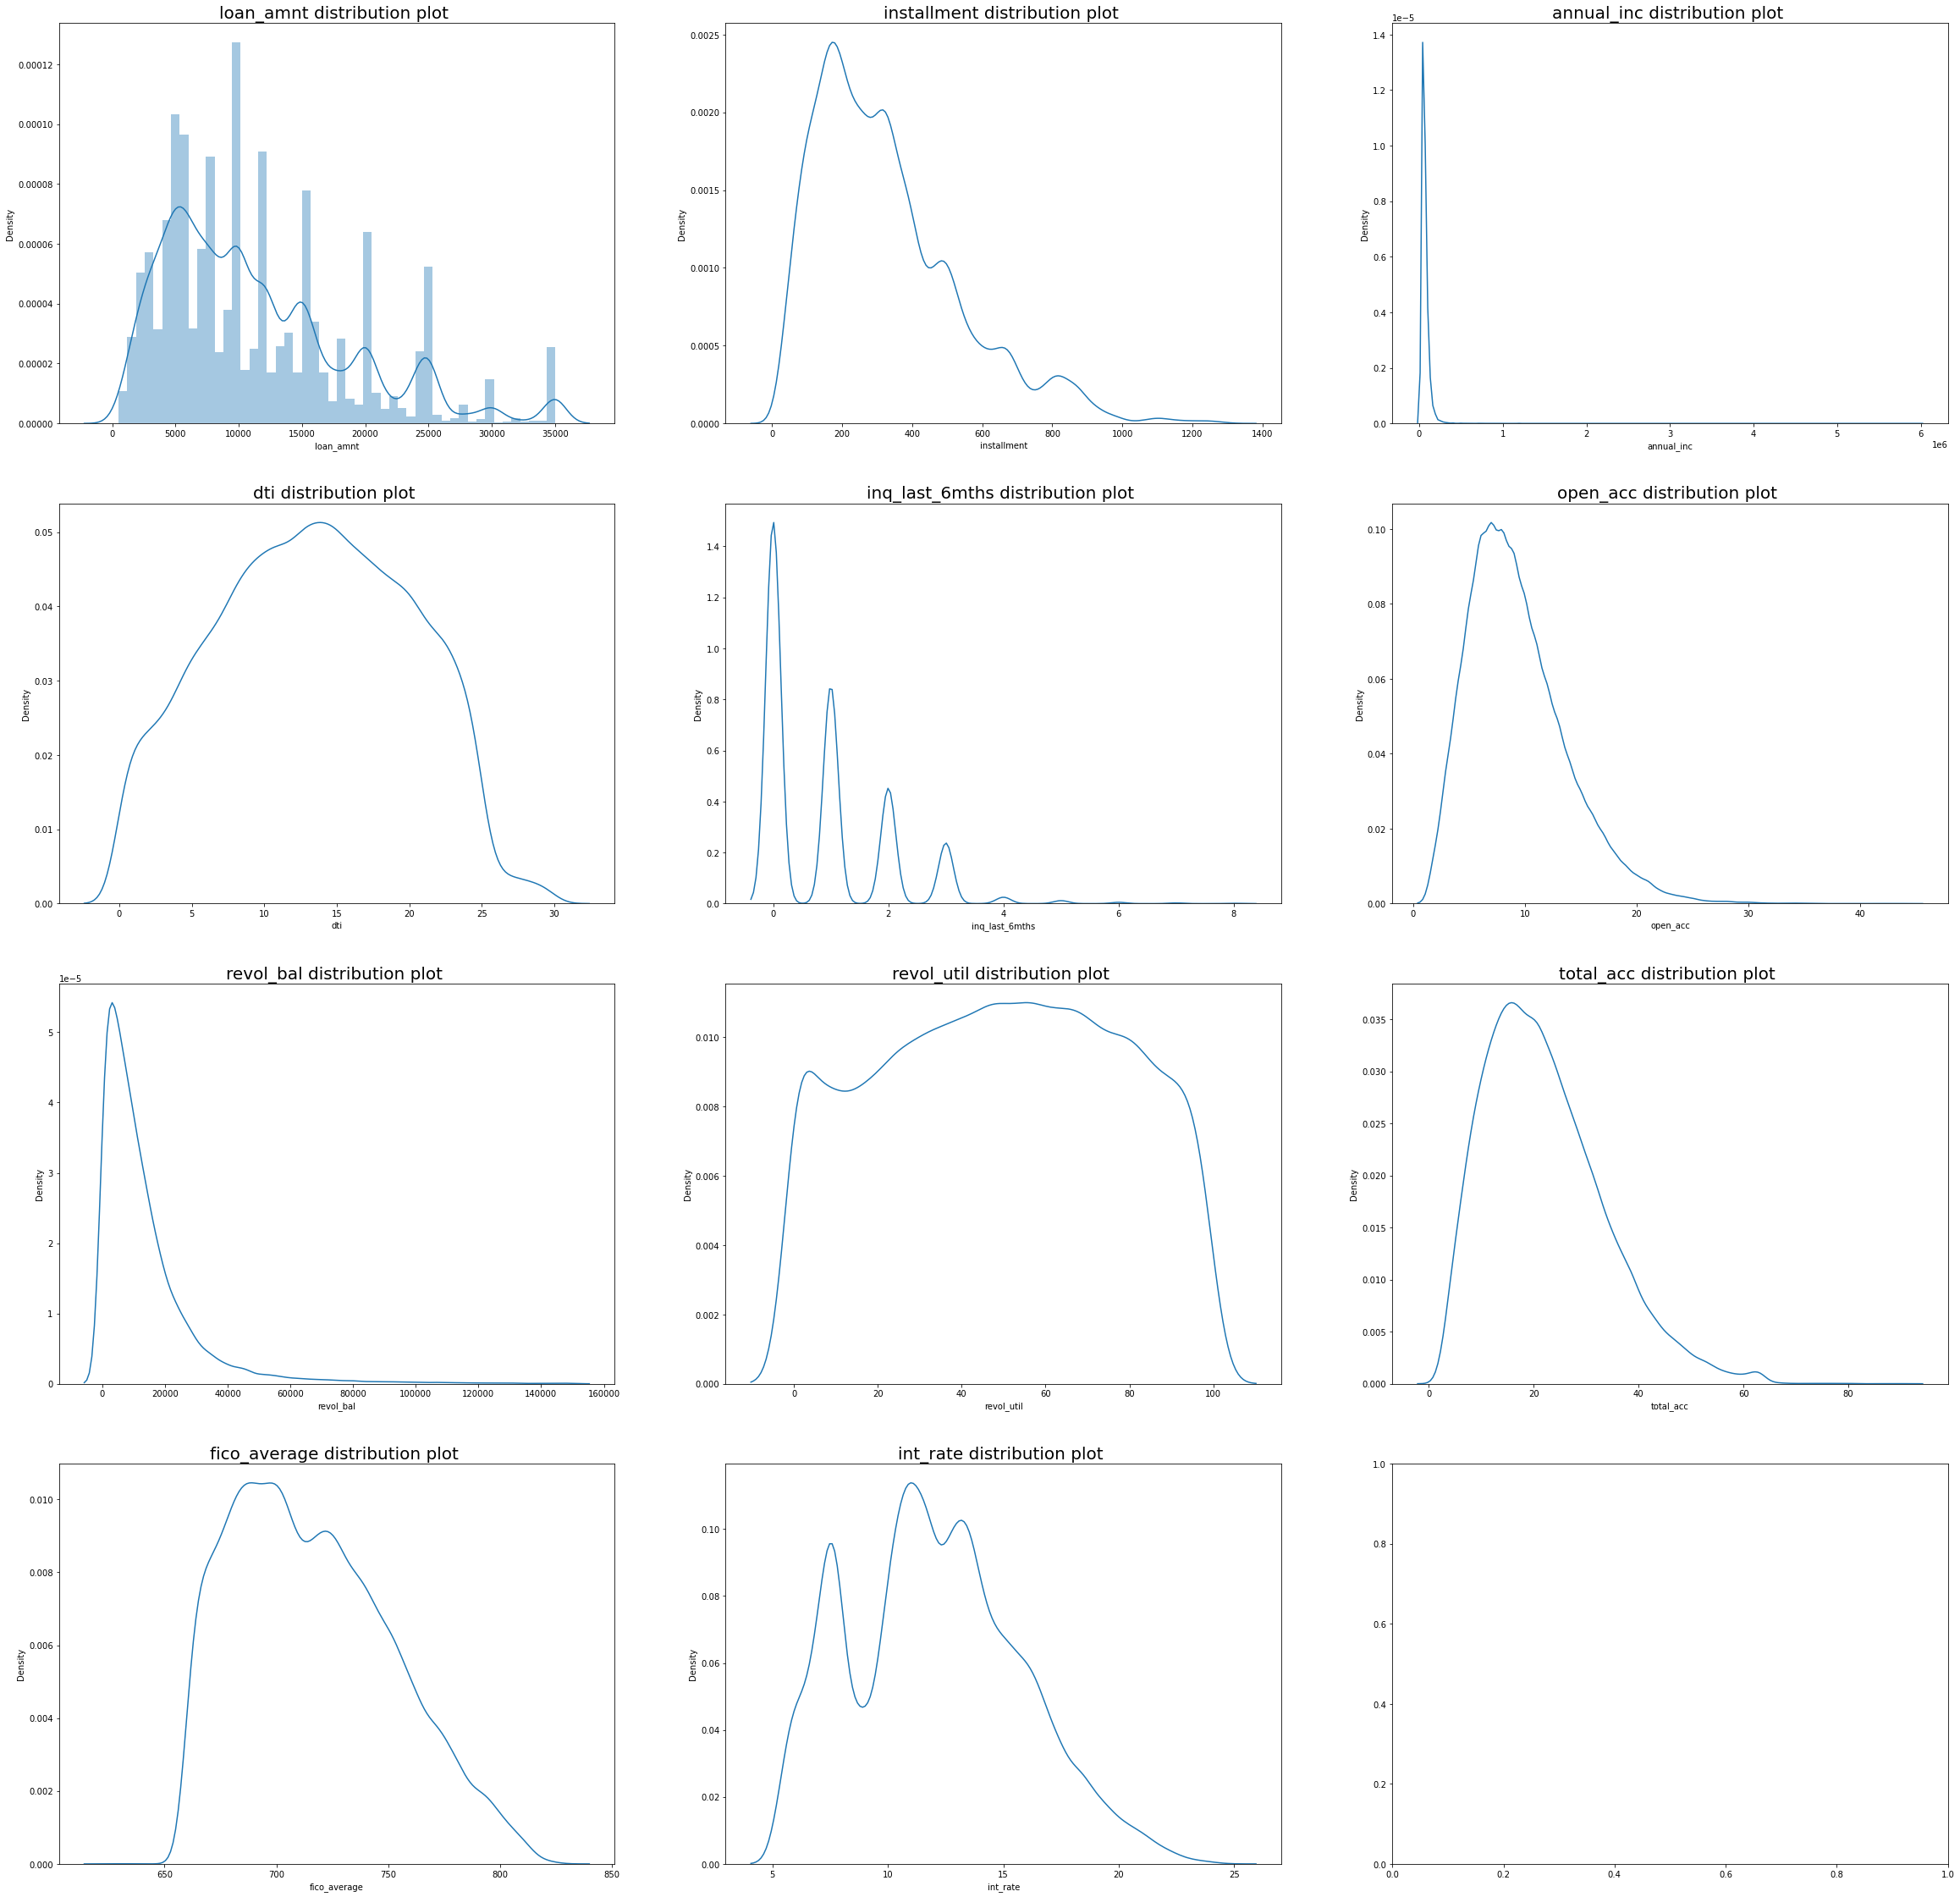

In [55]:
# Create distribution plot for numerical variables

fig, axes = plt.subplots(nrows=4, ncols =3)
fig.set_size_inches(40, 40)

a=sns.distplot(df['loan_amnt'],hist=True, ax=axes[0][0])
a.set_title("loan_amnt distribution plot ", fontsize=20)

b=sns.distplot(df['installment'], hist=False, ax=axes[0][1])
b.set_title("installment distribution plot ", fontsize=20)

c=sns.distplot(df['annual_inc'], hist=False, ax=axes[0][2])
c.set_title("annual_inc distribution plot ", fontsize=20)

d=sns.distplot(df['dti'], hist=False, ax=axes[1][0])
d.set_title("dti distribution plot ", fontsize=20)

e=sns.distplot(df['inq_last_6mths'], hist=False, ax=axes[1][1])
e.set_title("inq_last_6mths distribution plot ", fontsize=20)

f=sns.distplot(df['open_acc'], hist=False, ax=axes[1][2])
f.set_title("open_acc distribution plot ", fontsize=20)

g=sns.distplot(df['revol_bal'], hist=False, ax=axes[2][0])
g.set_title("revol_bal distribution plot ", fontsize=20)

h=sns.distplot(df['revol_util'], hist=False, ax=axes[2][1])
h.set_title("revol_util distribution plot ", fontsize=20)

i=sns.distplot(df['total_acc'], hist=False, ax=axes[2][2])
i.set_title("total_acc distribution plot ", fontsize=20)

j=sns.distplot(df['fico_average'], hist=False, ax=axes[3][0])
j.set_title("fico_average distribution plot ", fontsize=20)

k=sns.distplot(df['int_rate'], hist=False, ax=axes[3][1])
k.set_title("int_rate distribution plot ", fontsize=20)


plt.show()

###### Inference: We performed univariate analysis for numerical variables using distplot and found most of the variables are slightly right skewed.

In [56]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'delinq_2yrs', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

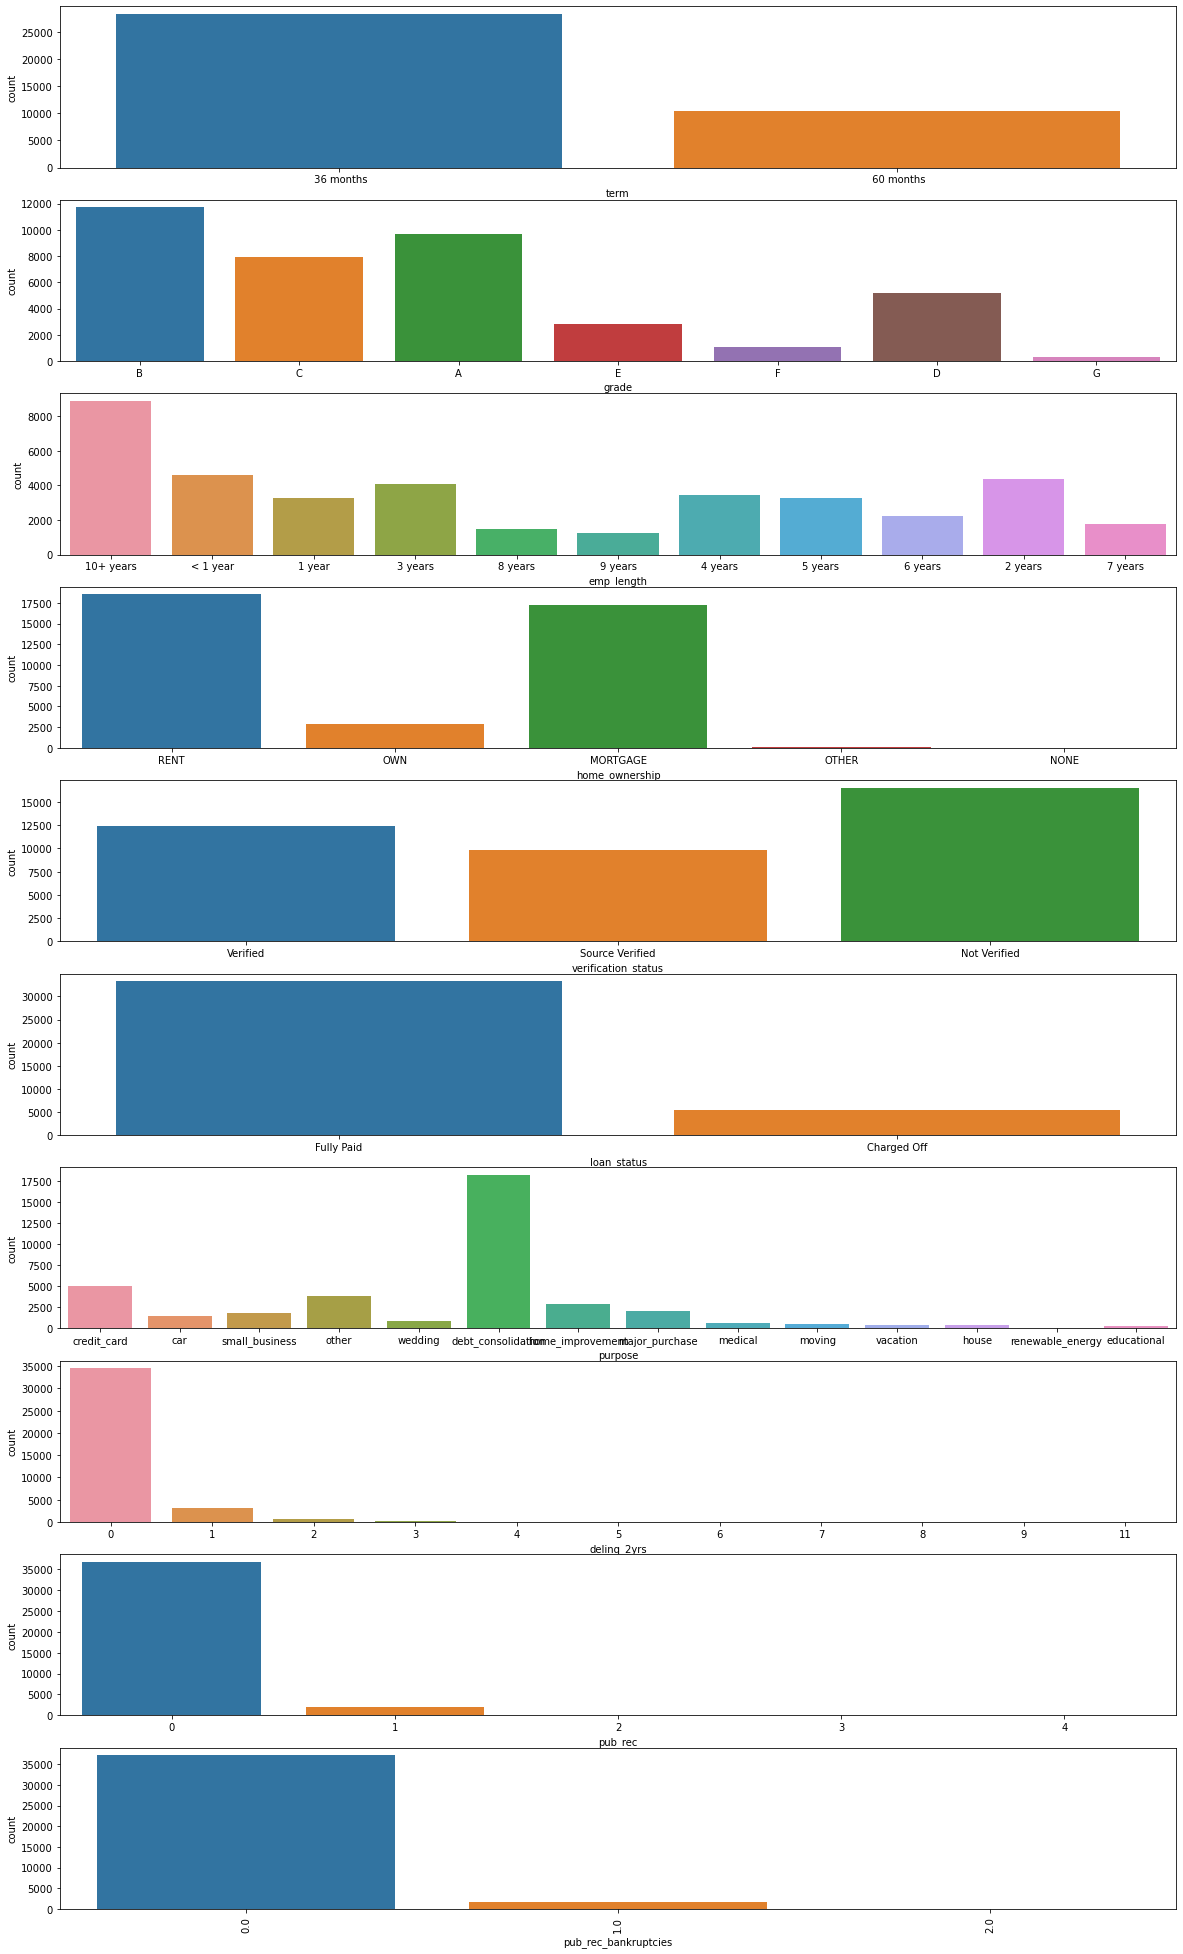

In [57]:
#Create countplot for categorical variables.

fig, axes = plt.subplots(nrows=10)
fig.set_size_inches(20, 35)

a = sns.countplot(x=df['term'] , orient = "v" , ax=axes[0])

b = sns.countplot(x=df['grade'] , orient = "v" , ax=axes[1])

c = sns.countplot(x=df['emp_length'] , orient = "v" , ax=axes[2])

d = sns.countplot(x=df['home_ownership'] , orient = "v" , ax=axes[3])

e = sns.countplot(x=df['verification_status'] , orient = "v" , ax=axes[4])

f = sns.countplot(x=df['loan_status'] , orient = "v" , ax=axes[5])
 
g = sns.countplot(x=df['purpose'], orient = "v" , ax=axes[6])

h = sns.countplot(x=df['delinq_2yrs'], orient = "v" , ax=axes[7])

i= sns.countplot(x=df['pub_rec'], orient = "v" , ax=axes[8])

j= sns.countplot(x=df['pub_rec_bankruptcies'], orient = "v" , ax=axes[9])

plt.xticks(rotation='90')


plt.show()

Inferences: We performed univariate analysis for categorical variables using countplot and found the frequency of each category.

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Bivariate analysis

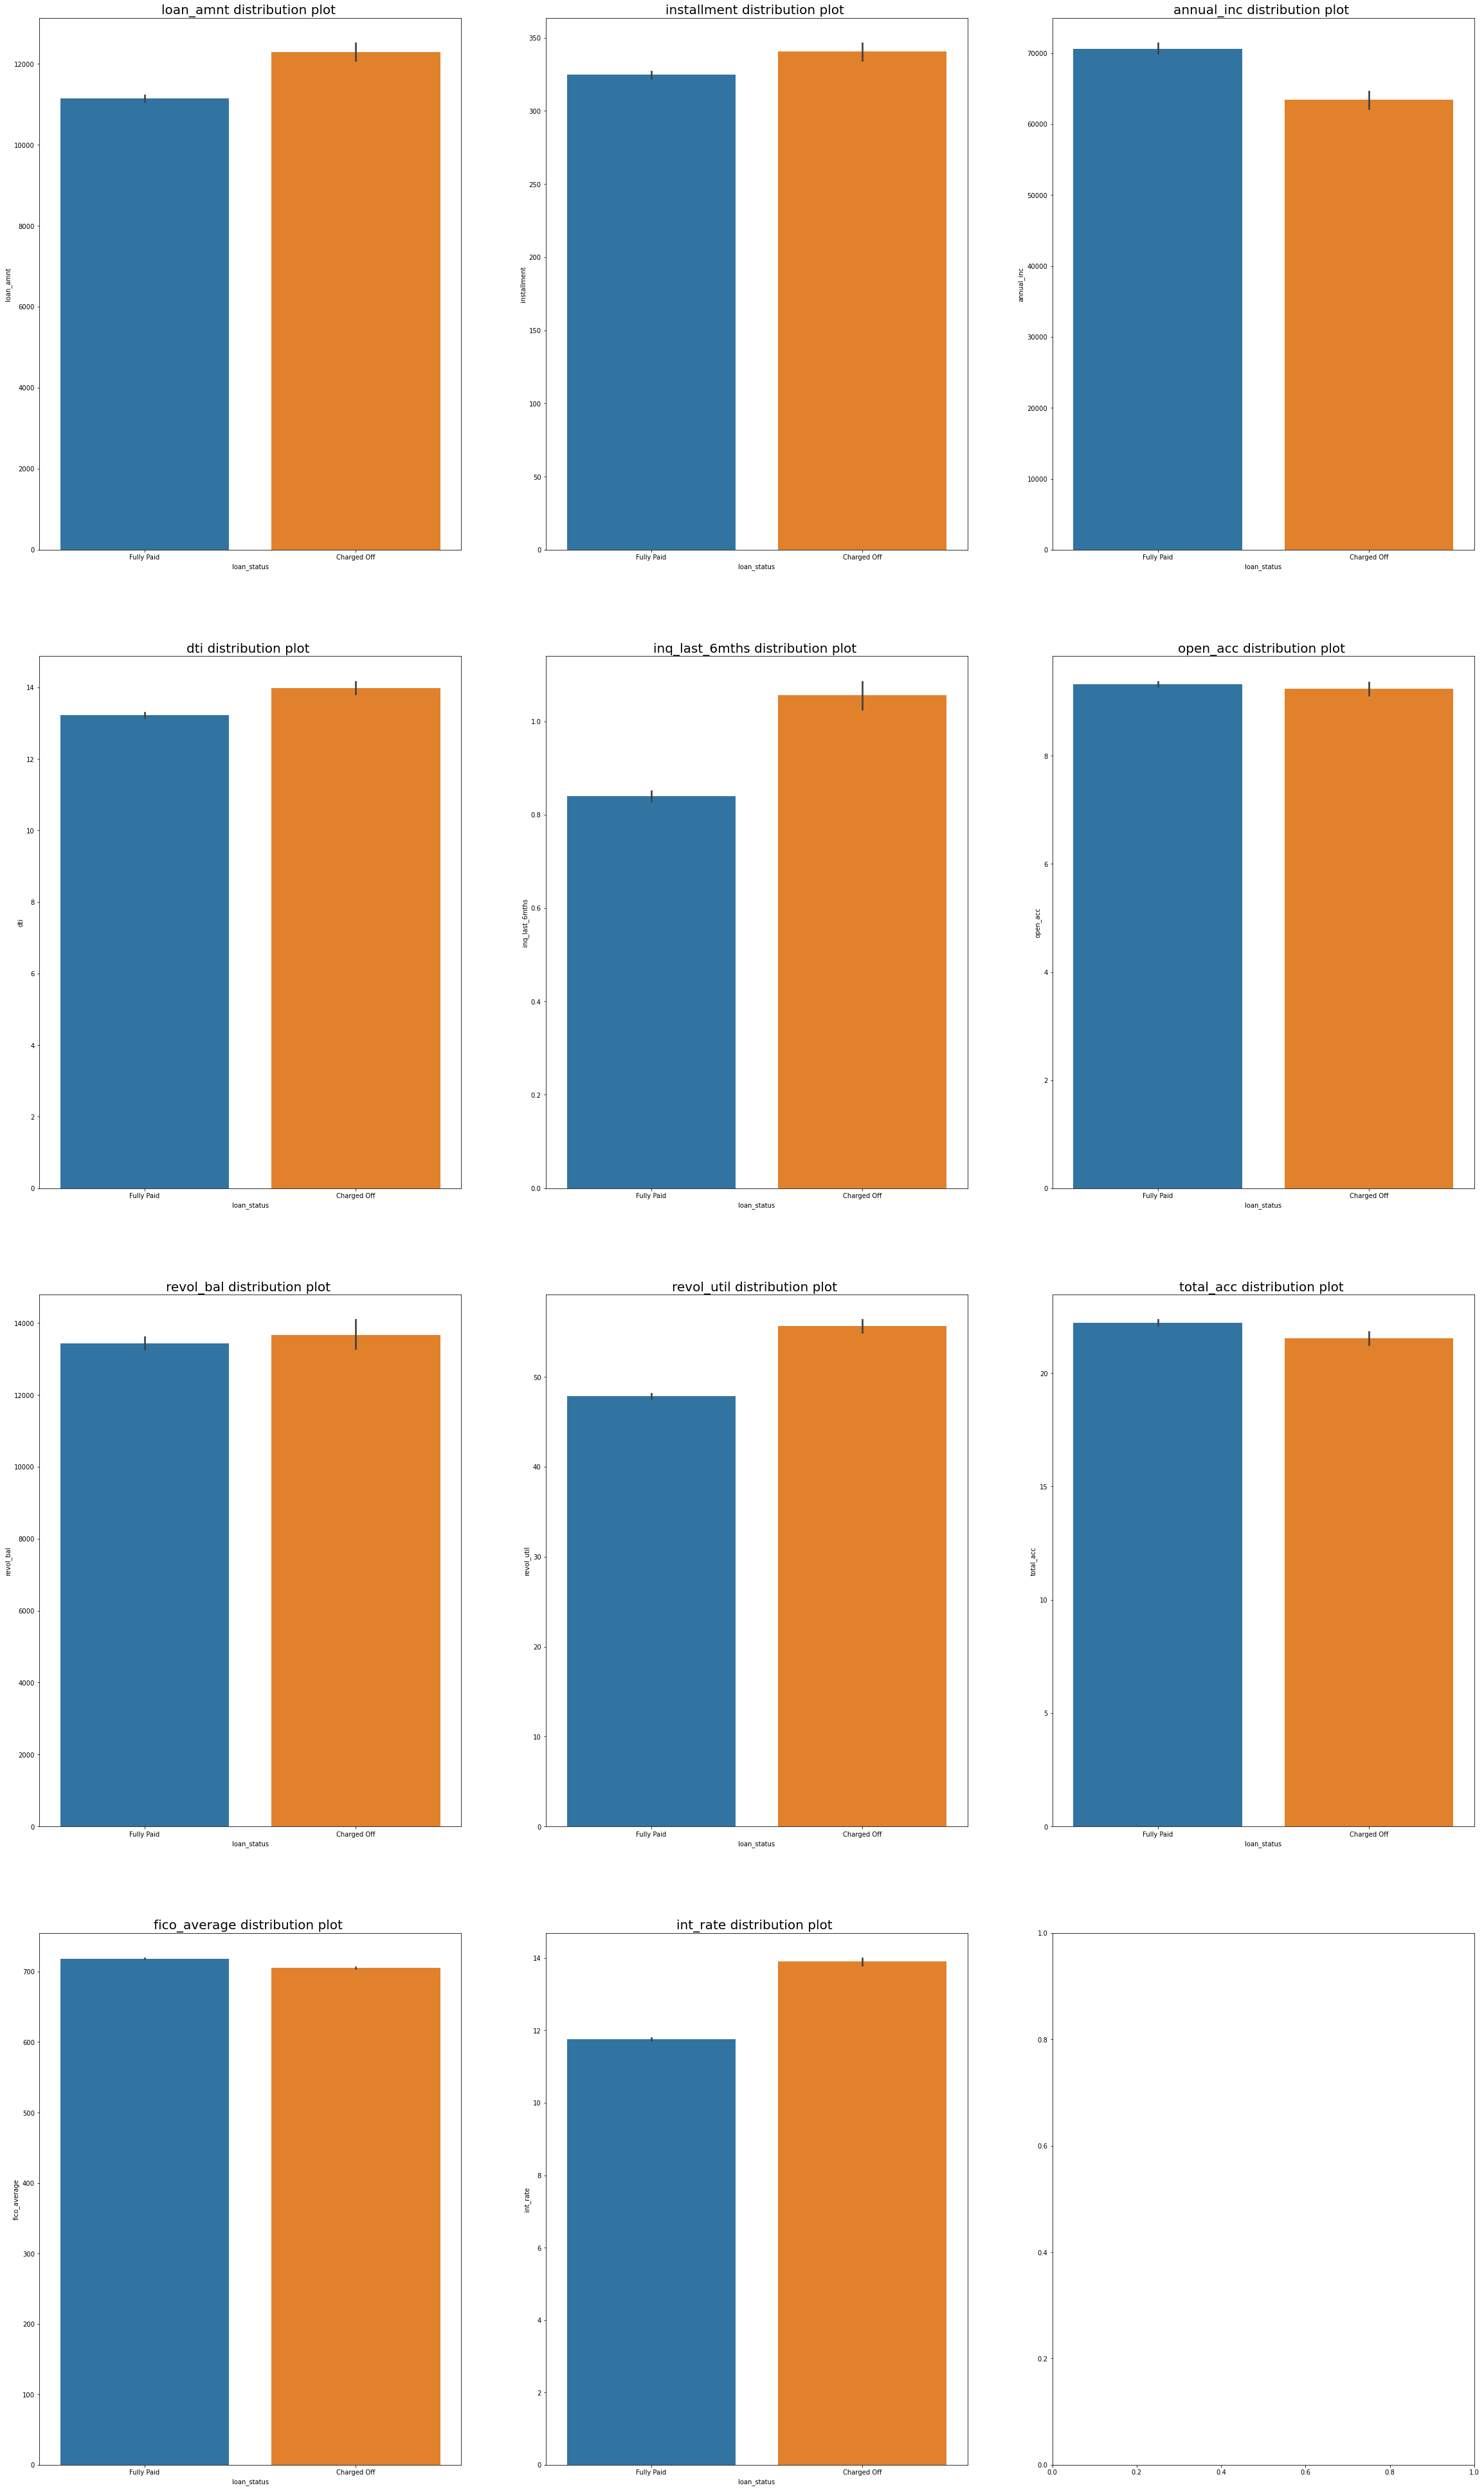

In [58]:
#Bivariate analysis between Target Variable and Numerical Variables

fig, axes = plt.subplots(nrows=4, ncols =3)
fig.set_size_inches(40, 70)

a=sns.barplot(x=df['loan_status'],y=df['loan_amnt'],ax=axes[0][0])
a.set_title("loan_amnt distribution plot ", fontsize=20)

b=sns.barplot(x=df['loan_status'],y=df['installment'],ax=axes[0][1])
b.set_title("installment distribution plot ", fontsize=20)

c=sns.barplot(x=df['loan_status'],y=df['annual_inc'],ax=axes[0][2])
c.set_title("annual_inc distribution plot ", fontsize=20)

d=sns.barplot(x=df['loan_status'],y=df['dti'],ax=axes[1][0])
d.set_title("dti distribution plot ", fontsize=20)

e=sns.barplot(x=df['loan_status'],y=df['inq_last_6mths'],ax=axes[1][1])
e.set_title("inq_last_6mths distribution plot ", fontsize=20)

f=sns.barplot(x=df['loan_status'],y=df['open_acc'],ax=axes[1][2])
f.set_title("open_acc distribution plot ", fontsize=20)

g=sns.barplot(x=df['loan_status'],y=df['revol_bal'],ax=axes[2][0])
g.set_title("revol_bal distribution plot ", fontsize=20)

h=sns.barplot(x=df['loan_status'],y=df['revol_util'],ax=axes[2][1])
h.set_title("revol_util distribution plot ", fontsize=20)

i=sns.barplot(x=df['loan_status'],y=df['total_acc'],ax=axes[2][2])
i.set_title("total_acc distribution plot ", fontsize=20)

j=sns.barplot(x=df['loan_status'],y=df['fico_average'],ax=axes[3][0])
j.set_title("fico_average distribution plot ", fontsize=20)

k=sns.barplot(x=df['loan_status'],y=df['int_rate'],ax=axes[3][1])
k.set_title("int_rate distribution plot ", fontsize=20)

plt.show()

Inference: we have performed bivariate analysis for numerical variables with the target variable loan status using barplot and found the mean of each numerical variable with respect to the target variable.

### Bivariate analysis between Target Variable and Categorical Variables.

In [59]:
ct1 = pd.crosstab(df['loan_status'] , df['term']).apply(lambda r: r/r.sum()*100,axis = 0)
ct1

term,36 months,60 months
loan_status,,
Charged Off,10.863648,22.713751
Fully Paid,89.136352,77.286249


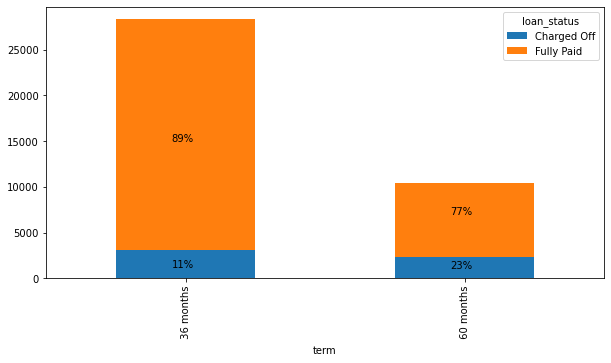

In [60]:
ax = pd.crosstab(df['term'],df['loan_status'])
ax.plot(kind='bar',stacked=True,figsize=(10,5))
plt.text(x=-0.05,y=15000,s='89%')
plt.text(x=-0.05,y=1200,s='11%')
plt.text(x=0.95,y=7000,s='77%')
plt.text(x=0.95,y=1100,s='23%')
plt.show()

In [61]:
ct2 = pd.crosstab(df['loan_status'] , df['grade']).apply(lambda r: r/r.sum()*100,axis = 0)
ct2

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.755544,11.642021,16.326531,21.043545,25.257915,30.628019,31.545741
Fully Paid,94.244456,88.357979,83.673469,78.956455,74.742085,69.371981,68.454259


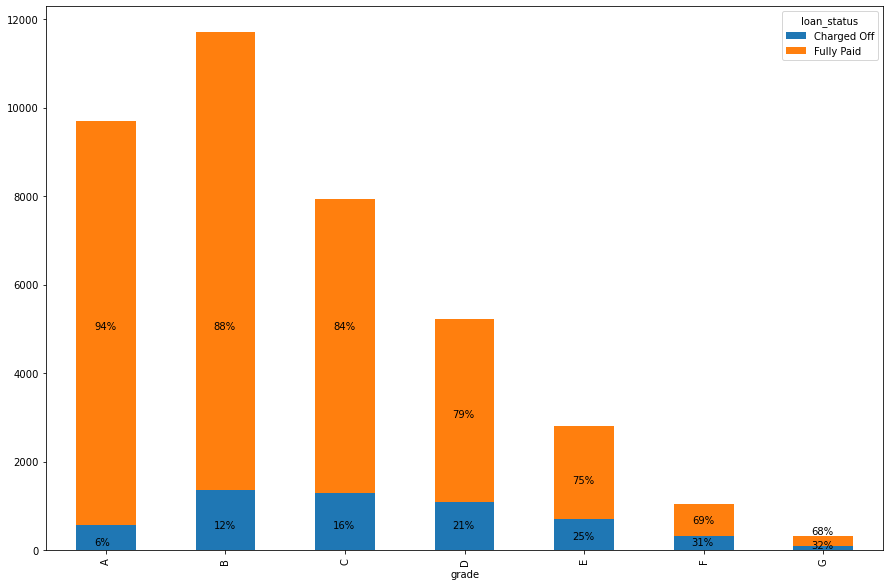

In [62]:
bx = pd.crosstab(df['grade'],df['loan_status'])
bx.plot(kind='bar',stacked=True, figsize=(15,10))
plt.text(x=-0.1,y=5000,s='94%')
plt.text(x=-0.1,y=100,s='6%')
plt.text(x=0.9,y=5000,s='88%')
plt.text(x=0.9,y=500,s='12%')
plt.text(x=1.9,y=5000,s='84%')
plt.text(x=1.9,y=500,s='16%')
plt.text(x=2.9,y=3000,s='79%')
plt.text(x=2.9,y=500,s='21%')
plt.text(x=3.9,y=1500,s='75%')
plt.text(x=3.9,y=250,s='25%')
plt.text(x=4.9,y=600,s='69%')
plt.text(x=4.9,y=100,s='31%')
plt.text(x=5.9,y=350,s='68%')
plt.text(x=5.9,y=50,s='32%')

plt.show()

In [63]:
ct3 = pd.crosstab(df['loan_status'] , df['emp_length']).apply(lambda r: r/r.sum()*100,axis = 0)
ct3

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,14.166923,15.147769,12.994993,13.616398,13.530778,13.968351,13.850291,14.816901,13.872054,12.629071,13.965142
Fully Paid,85.833077,84.852231,87.005007,86.383602,86.469222,86.031649,86.149709,85.183099,86.127946,87.370929,86.034858


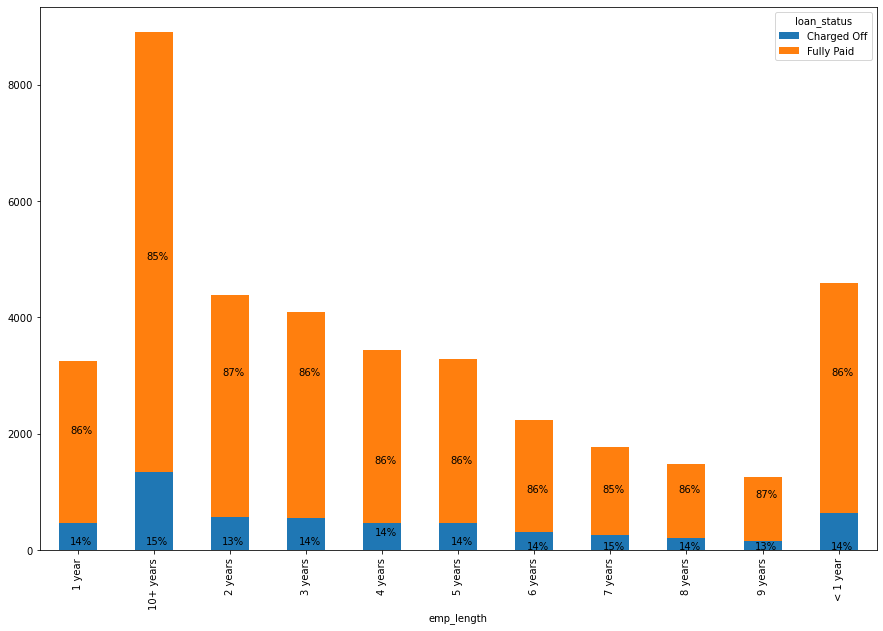

In [64]:
cx = pd.crosstab(df['emp_length'],df['loan_status'])
cx.plot(kind='bar',stacked=True , figsize=(15,10))
plt.text(x=-0.1,y=2000,s='86%')
plt.text(x=-0.1,y=100,s='14%')
plt.text(x=0.9,y=5000,s='85%')
plt.text(x=0.9,y=100,s='15%')
plt.text(x=1.9,y=3000,s='87%')
plt.text(x=1.9,y=100,s='13%')
plt.text(x=2.9,y=3000,s='86%')
plt.text(x=2.9,y=100,s='14%')
plt.text(x=3.9,y=1500,s='86%')
plt.text(x=3.9,y=250,s='14%')
plt.text(x=4.9,y=1500,s='86%')
plt.text(x=4.9,y=100,s='14%')
plt.text(x=5.9,y=1000,s='86%')
plt.text(x=5.9,y=20,s='14%')
plt.text(x=6.9,y=1000,s='85%')
plt.text(x=6.9,y=10,s='15%')
plt.text(x=7.9,y=1000,s='86%')
plt.text(x=7.9,y=10,s='14%')
plt.text(x=8.9,y=900,s='87%')
plt.text(x=8.9,y=10,s='13%')
plt.text(x=9.9,y=3000,s='86%')
plt.text(x=9.9,y=10,s='14%')

plt.show()

In [65]:
ct4 = pd.crosstab(df['loan_status'] , df['home_ownership']).apply(lambda r: r/r.sum()*100,axis = 0)
ct4

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,13.144016,0.0,18.367347,14.130053,14.870049
Fully Paid,86.855984,100.0,81.632653,85.869947,85.129951


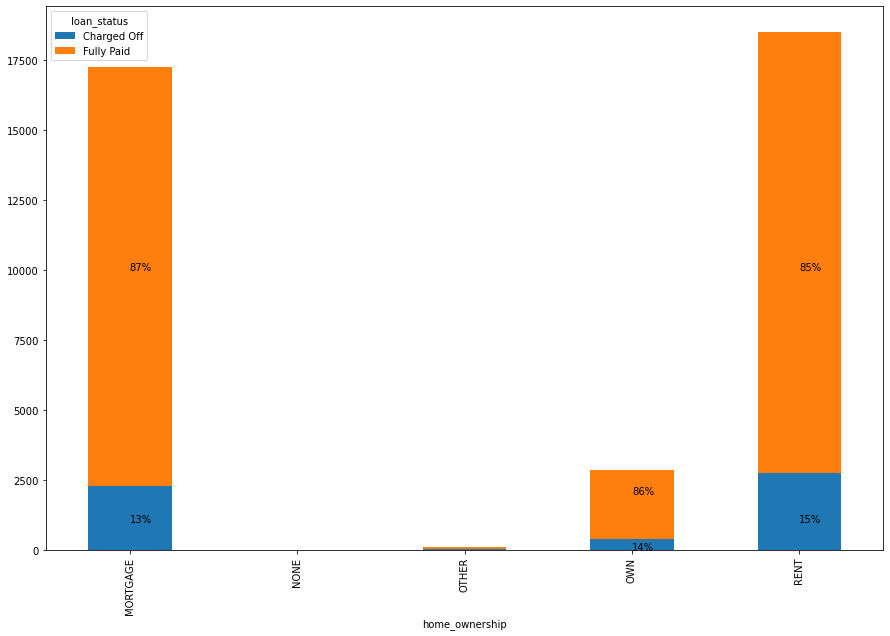

In [66]:
dx = pd.crosstab(df['home_ownership'],df['loan_status'])
dx.plot(kind='bar',stacked=True,figsize=(15,10))
plt.text(x=0,y=10000,s='87%')
plt.text(x=0,y=1000,s='13%')
plt.text(x=3,y=2000,s='86%')
plt.text(x=3,y=5,s='14%')
plt.text(x=4,y=10000,s='85%')
plt.text(x=4,y=1000,s='15%')

plt.show()

In [67]:
ct5 = pd.crosstab(df['loan_status'] , df['verification_status']).apply(lambda r: r/r.sum()*100,axis = 0)
ct5


verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,12.422737,14.390467,15.960281
Fully Paid,87.577263,85.609533,84.039719


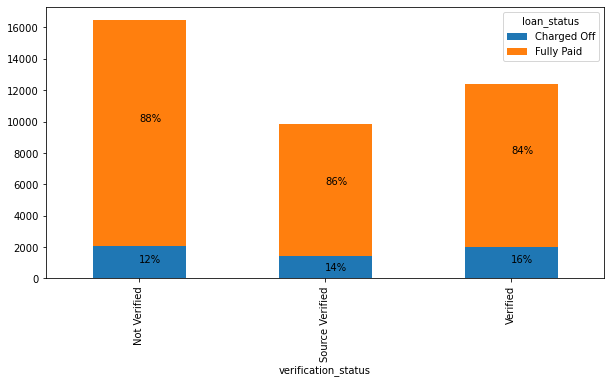

In [68]:
ex = pd.crosstab(df['verification_status'],df['loan_status'])
ex.plot(kind='bar',stacked=True,figsize=(10,5))
plt.text(x=0,y=10000,s='88%')
plt.text(x=0,y=1000,s='12%')
plt.text(x=1,y=6000,s='86%')
plt.text(x=1,y=500,s='14%')
plt.text(x=2,y=8000,s='84%')
plt.text(x=2,y=1000,s='16%')

plt.show()

In [69]:
ct7 = pd.crosstab(df['loan_status'] , df['purpose']).apply(lambda r: r/r.sum()*100,axis = 0)
ct7

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,10.340227,10.305572,14.789888,16.403785,11.534465,15.98916,9.971645,15.074627,15.026834,15.625,18.947368,26.091825,14.204545,9.839572
Fully Paid,89.659773,89.694428,85.210112,83.596215,88.465535,84.01084,90.028355,84.925373,84.973166,84.375,81.052632,73.908175,85.795455,90.160428


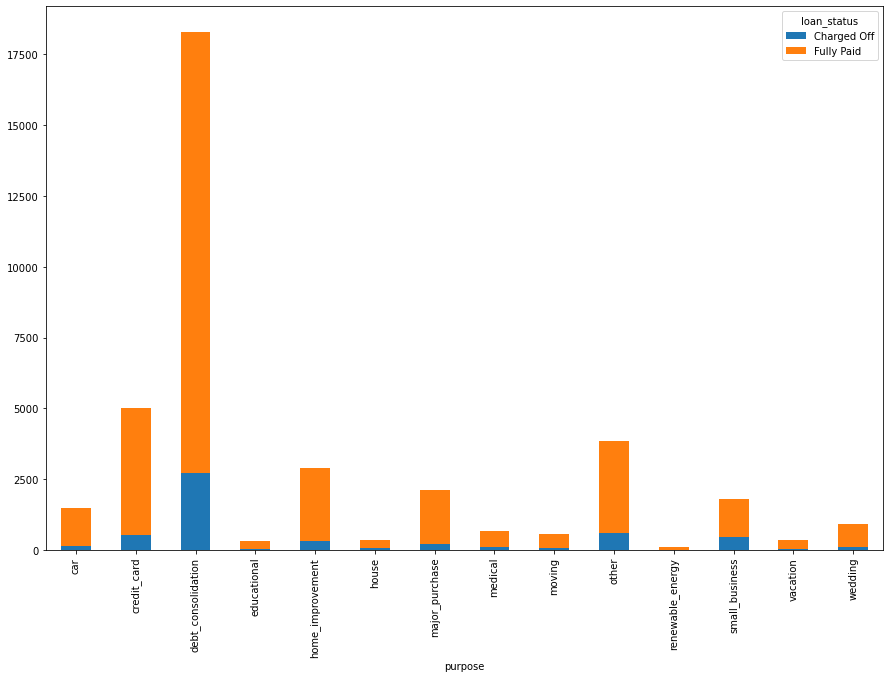

In [70]:
gx = pd.crosstab(df['purpose'],df['loan_status'])
gx.plot(kind='bar',stacked=True,figsize=(15,10))

plt.show()

In [71]:
ct8 = pd.crosstab(df['loan_status'] , df['delinq_2yrs']).apply(lambda r: r/r.sum()*100,axis = 0)
ct8

delinq_2yrs,0,1,2,3,4,5,6,7,8,9,11
loan_status,,,,,,,,,,,
Charged Off,13.835092,15.218064,18.712575,14.883721,21.311475,14.285714,10.0,25.0,50.0,0.0,0.0
Fully Paid,86.164908,84.781936,81.287425,85.116279,78.688525,85.714286,90.0,75.0,50.0,100.0,100.0


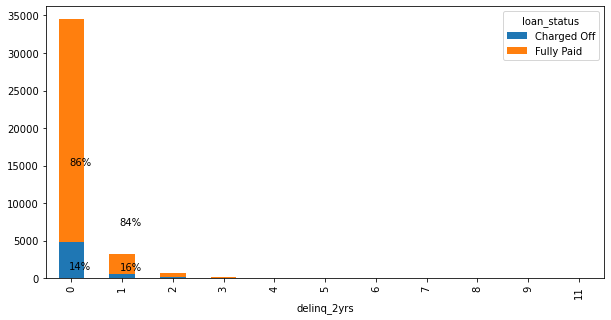

In [72]:
hx = pd.crosstab(df['delinq_2yrs'],df['loan_status'])
hx.plot(kind='bar',stacked=True,figsize=(10,5))
plt.text(x=-0.05,y=15000,s='86%')
plt.text(x=-0.05,y=1200,s='14%')
plt.text(x=0.95,y=7000,s='84%')
plt.text(x=0.95,y=1100,s='16%')
plt.show()

In [73]:
ct9 = pd.crosstab(df['loan_status'] , df['pub_rec']).apply(lambda r: r/r.sum()*100,axis = 0)
ct9

pub_rec,0,1,2,3,4
loan_status,,,,,
Charged Off,13.625715,22.073234,20.408163,0.0,0.0
Fully Paid,86.374285,77.926766,79.591837,100.0,100.0


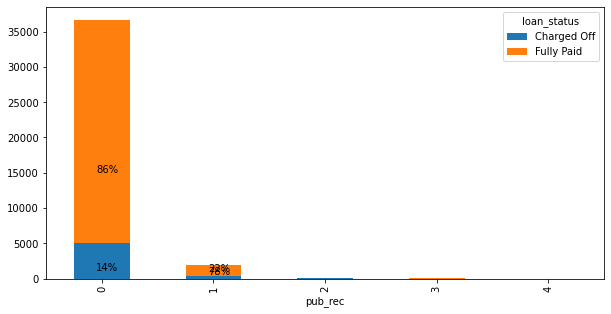

In [74]:
ix = pd.crosstab(df['pub_rec'],df['loan_status'])
ix.plot(kind='bar',stacked=True,figsize=(10,5))
plt.text(x=-0.05,y=15000,s='86%')
plt.text(x=-0.05,y=1200,s='14%')
plt.text(x=0.95,y=500,s='78%')
plt.text(x=0.95,y=1000,s='22%')
plt.show()

In [75]:
ct10 = pd.crosstab(df['loan_status'] , df['pub_rec_bankruptcies']).apply(lambda r: r/r.sum()*100,axis = 0)
ct10

pub_rec_bankruptcies,0.0,1.0,2.0
loan_status,,,
Charged Off,13.731351,21.633695,28.571429
Fully Paid,86.268649,78.366305,71.428571


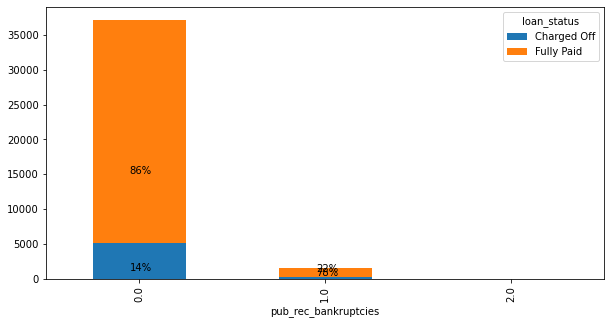

In [76]:
jx = pd.crosstab(df['pub_rec_bankruptcies'],df['loan_status'])
jx.plot(kind='bar',stacked=True,figsize=(10,5))
plt.text(x=-0.05,y=15000,s='86%')
plt.text(x=-0.05,y=1200,s='14%')
plt.text(x=0.95,y=500,s='78%')
plt.text(x=0.95,y=1000,s='22%')
plt.show()

###### Inference: we have performed bivariate analysis for categorical variables with the target variable loan status using cross tab and stacked bar and found the percentage of each categorical variable with respect to the target variable.

### Scatterplot for Bivariate Analysis

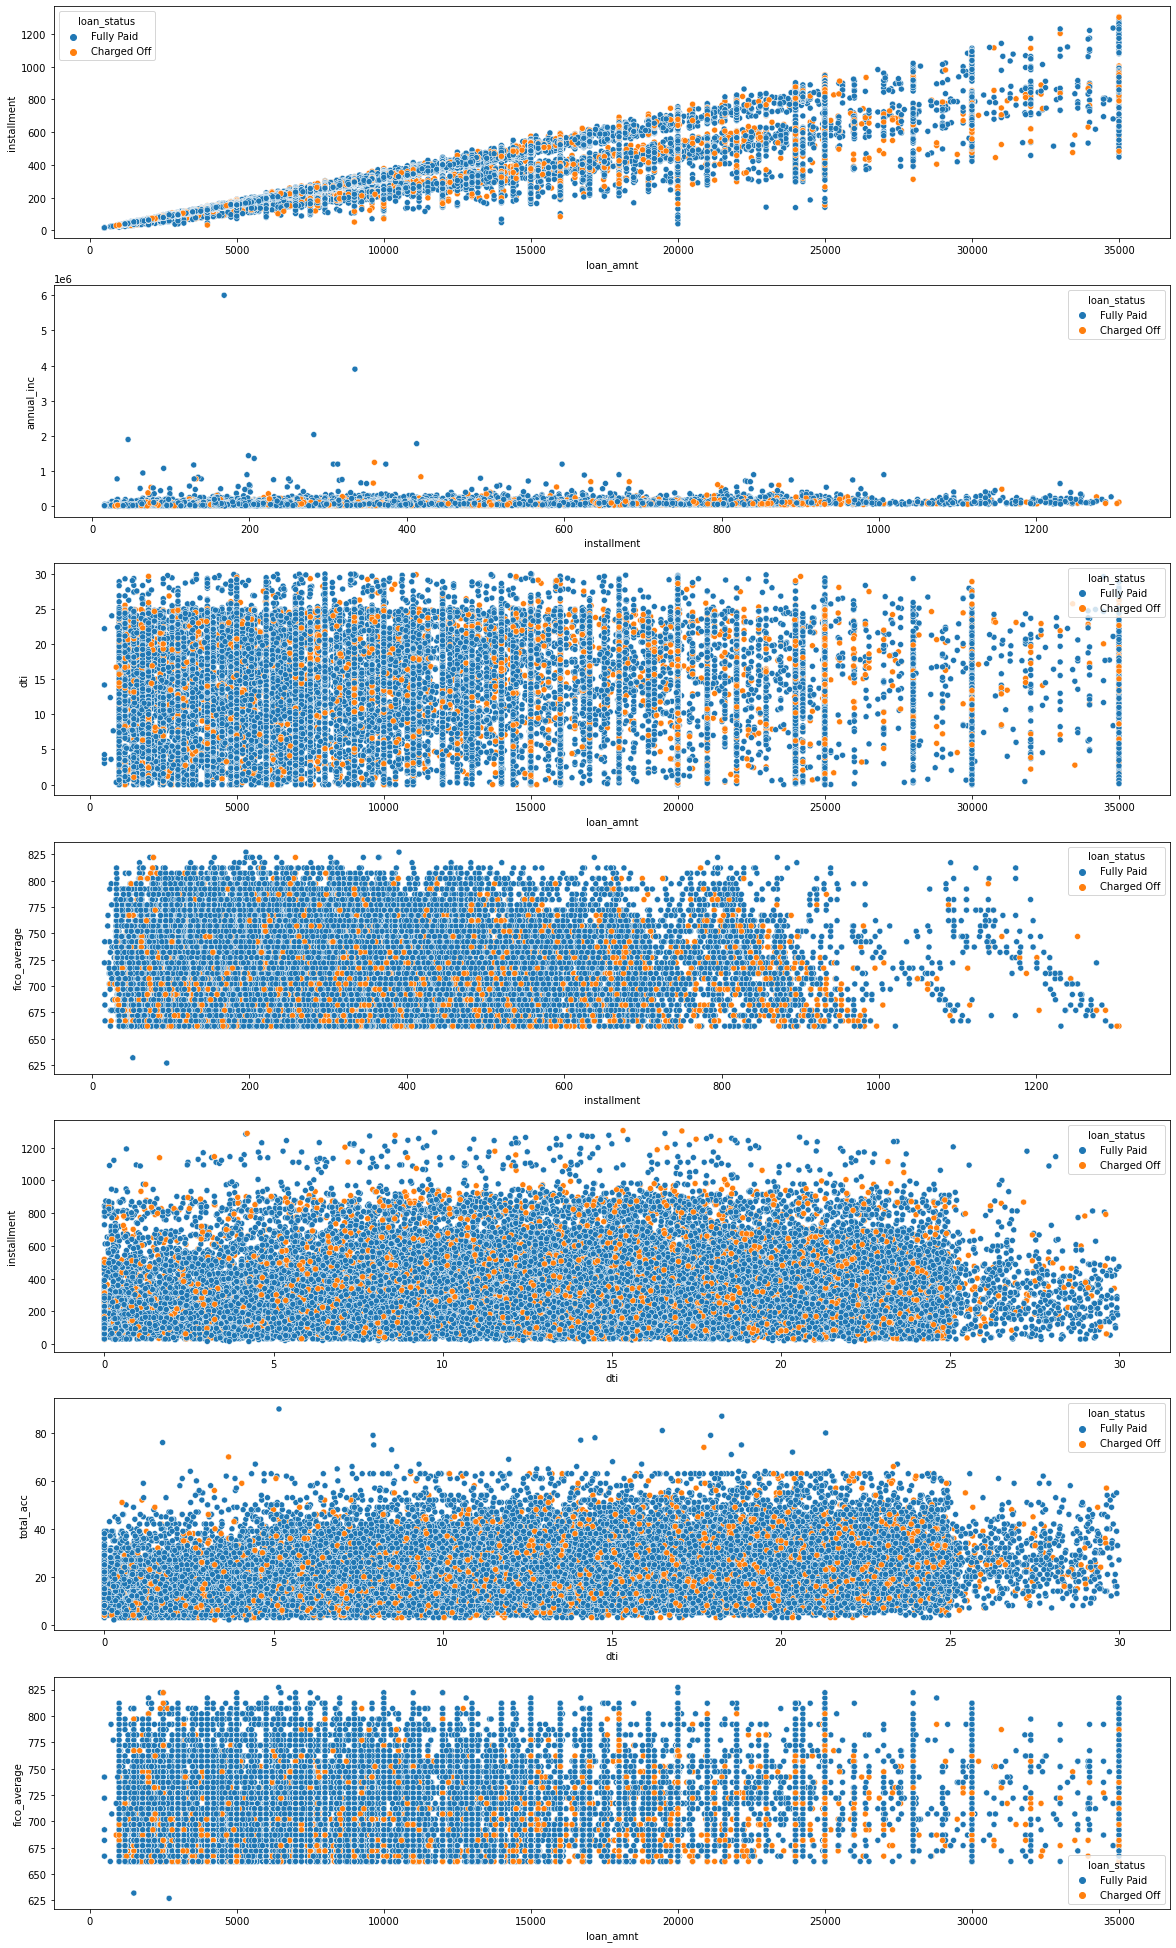

In [77]:
fig, axes = plt.subplots(nrows=7)
fig.set_size_inches(20, 35)
a = sns.scatterplot(data = df ,x = 'loan_amnt',y = 'installment',hue = 'loan_status', ax=axes[0])
b = sns.scatterplot(data = df ,x = 'installment' ,y = 'annual_inc',hue = 'loan_status', ax=axes[1])
c = sns.scatterplot(data = df ,x = 'loan_amnt',y = 'dti' ,hue = 'loan_status', ax=axes[2])
d = sns.scatterplot(data = df ,x = 'installment',y = 'fico_average',hue = 'loan_status',ax=axes[3])
e = sns.scatterplot(data = df ,x = 'dti',y = 'installment',hue = 'loan_status',ax=axes[4])
f = sns.scatterplot(data = df ,x = 'dti',y = 'total_acc',hue = 'loan_status',ax=axes[5])
g = sns.scatterplot(data = df ,x = 'loan_amnt',y = 'fico_average',hue = 'loan_status',ax=axes[6])
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Multivariate analysis

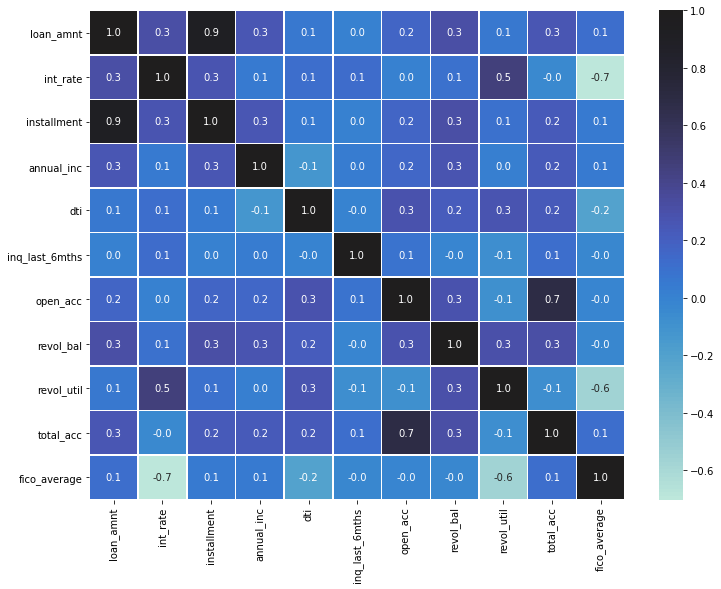

In [78]:
 # heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

In [79]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
loan_amnt,1.000000,0.308692,0.929688,0.268627,0.066232,0.009736,0.173909,0.317629,0.067842,0.256028,0.121177
int_rate,0.308692,1.000000,0.281043,0.050607,0.112561,0.131960,0.012160,0.098767,0.463079,-0.042128,-0.701830
installment,0.929688,0.281043,1.000000,0.267870,0.053608,0.010213,0.169680,0.312675,0.096515,0.230294,0.055609
annual_inc,0.268627,0.050607,0.267870,1.000000,-0.124515,0.034682,0.155719,0.279672,0.016867,0.234544,0.053301
dti,0.066232,0.112561,0.053608,-0.124515,1.000000,-0.000308,0.289211,0.228296,0.278816,0.231104,-0.197183
inq_last_6mths,0.009736,0.131960,0.010213,0.034682,-0.000308,1.000000,0.091936,-0.022503,-0.068685,0.111889,-0.036929
open_acc,0.173909,0.012160,0.169680,0.155719,0.289211,0.091936,1.000000,0.287830,-0.085107,0.685574,-0.022860
revol_bal,0.317629,0.098767,0.312675,0.279672,0.228296,-0.022503,0.287830,1.000000,0.304424,0.314144,-0.033802
revol_util,0.067842,0.463079,0.096515,0.016867,0.278816,-0.068685,-0.085107,0.304424,1.000000,-0.065562,-0.556963
total_acc,0.256028,-0.042128,0.230294,0.234544,0.231104,0.111889,0.685574,0.314144,-0.065562,1.000000,0.115545


###### Inference: We performed multivariate analysis for the numerical variables using correlation and plotted it using heat map and found that installment and loan_amount are highly correlated with eachother.

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Handling Outliers

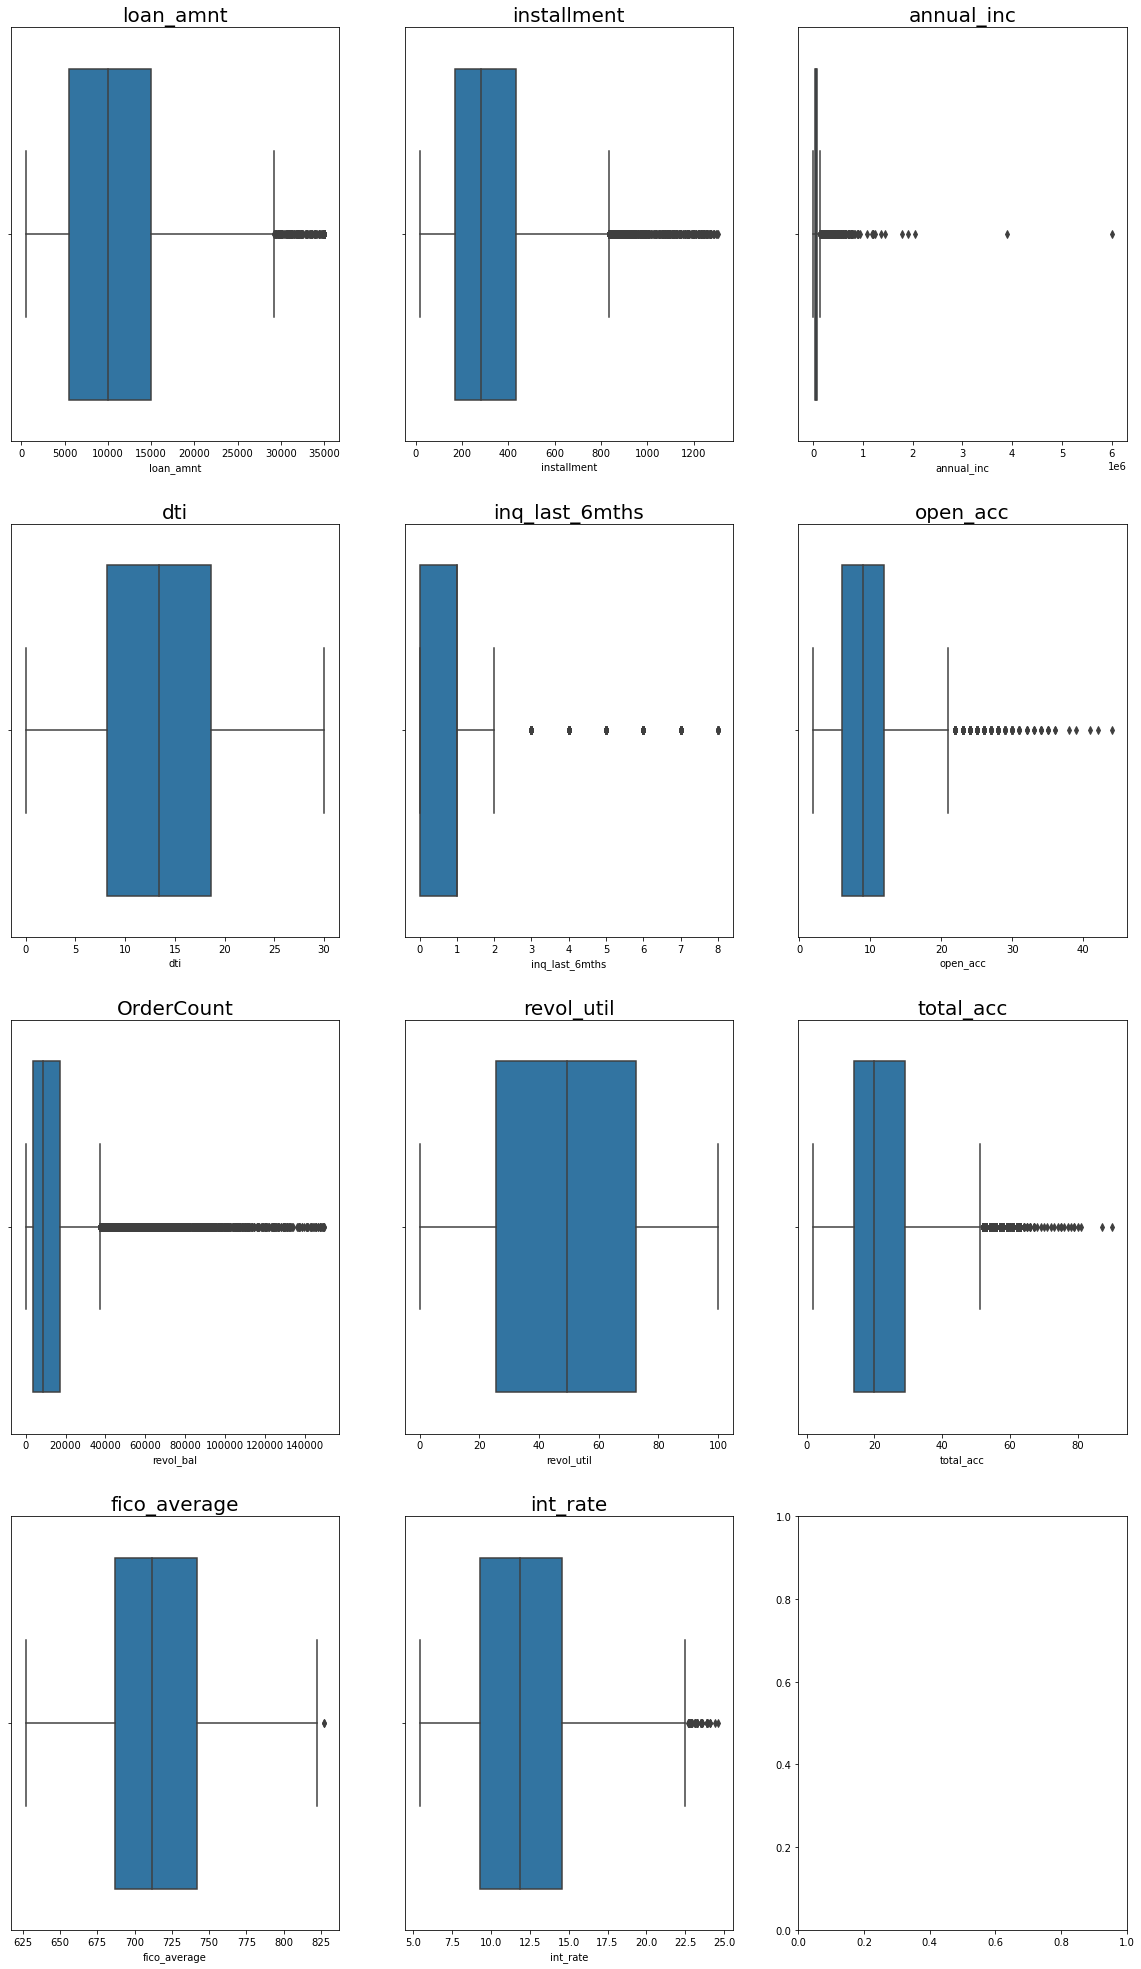

In [80]:
# Create Box plot for data set

fig, axes = plt.subplots(nrows=4, ncols =3)
fig.set_size_inches(20, 35)

a = sns.boxplot(df['loan_amnt'] , orient = "v" , ax=axes[0][0])
a.set_title("loan_amnt",fontsize=20)

b = sns.boxplot(df['installment'] , orient = "v" , ax=axes[0][1])
b.set_title("installment",fontsize=20)

c = sns.boxplot(df['annual_inc'] , orient = "v" , ax=axes[0][2])
c.set_title("annual_inc",fontsize=20)

d = sns.boxplot(df['dti'] , orient = "v" , ax=axes[1][0])
d.set_title("dti",fontsize=20)

e = sns.boxplot(df['inq_last_6mths'] , orient = "v" , ax=axes[1][1])
e.set_title("inq_last_6mths",fontsize=20)

f = sns.boxplot(df['open_acc'] , orient = "v" , ax=axes[1][2])
f.set_title("open_acc",fontsize=20)

g = sns.boxplot(df['revol_bal'] , orient = "v" , ax=axes[2][0])
g.set_title("OrderCount",fontsize=20)

h = sns.boxplot(df['revol_util'] , orient = "v" , ax=axes[2][1])
h.set_title("revol_util",fontsize=20)

i = sns.boxplot(df['total_acc'] , orient = "v" , ax=axes[2][2])
i.set_title("total_acc",fontsize=20)

j = sns.boxplot(df['fico_average'] , orient = "v" , ax=axes[3][0])
j.set_title("fico_average",fontsize=20)

k = sns.boxplot(df['int_rate'] , orient = "v" , ax=axes[3][1])
k.set_title("int_rate",fontsize=20)


plt.show()

In [81]:
#total no of outliers in each column
def count_outliers(feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    UB = q3+1.5*IQR
    LB = q1-1.5*IQR
    print('count of feature',feature,
          df[(df[feature]>UB) | (df[feature]<LB)][feature].count()) #Count of outliers
for i,col in enumerate(num_cols,1):
    count_outliers(col)

count of feature loan_amnt 1219
count of feature int_rate 78
count of feature installment 1155
count of feature annual_inc 1829
count of feature dti 0
count of feature inq_last_6mths 3544
count of feature open_acc 498
count of feature revol_bal 2438
count of feature revol_util 0
count of feature total_acc 694
count of feature fico_average 2


###### Inference : We plotted the outliers for each numercial features and found that  delinq_2yrs feature has the highest count of outliers.

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Applying capping technique for outliers.

In [82]:
#copying into a new dataframe
df2 = df.copy()

In [83]:
# outlier capping of installment
Q1 = df2['installment'].quantile(0.25)
Q3 = df2['installment'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

UC = df2['installment'].quantile(0.99)
LC = df2['installment'].quantile(0.01) 

for i in df2.index:
    if df2.loc[i,'installment']>UB:
        df2.loc[i,'installment'] = UC
    if df2.loc[i,'installment']<LB:
        df2.loc[i,'installment'] = LC

In [84]:
# outlier capping of inq_last_6 months
Q1 = df2['inq_last_6mths'].quantile(0.25)
Q3 = df2['inq_last_6mths'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

UC = df2['inq_last_6mths'].quantile(0.99)
LC = df2['inq_last_6mths'].quantile(0.01) 

for i in df2.index:
    if df2.loc[i,'inq_last_6mths']>UB:
        df2.loc[i,'inq_last_6mths'] = UC
    if df2.loc[i,'inq_last_6mths']<LB:
        df2.loc[i,'inq_last_6mths'] = LC

In [85]:
# outlier capping of revol_bal
Q1 = df2['revol_bal'].quantile(0.25)
Q3 = df2['revol_bal'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

UC = df2['revol_bal'].quantile(0.99)
LC = df2['revol_bal'].quantile(0.01) 

for i in df2.index:
    if df2.loc[i,'revol_bal']>UB:
        df2.loc[i,'revol_bal'] = UC
    if df2.loc[i,'revol_bal']<LB:
        df2.loc[i,'revol_bal'] = LC

In [86]:
# outlier capping of open account
Q1 = df2['open_acc'].quantile(0.25)
Q3 = df2['open_acc'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

UC = df2['open_acc'].quantile(0.99)
LC = df2['open_acc'].quantile(0.01) 

for i in df2.index:
    if df2.loc[i,'open_acc']>UB:
        df2.loc[i,'open_acc'] = UC
    if df2.loc[i,'open_acc']<LB:
        df2.loc[i,'open_acc'] = LC

In [87]:
# outlier capping of total_acc
Q1 = df2['total_acc'].quantile(0.25)
Q3 = df2['total_acc'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3+1.5*IQR
LB = Q1-1.5*IQR

UC = df2['total_acc'].quantile(0.99)
LC = df2['total_acc'].quantile(0.01) 

for i in df2.index:
    if df2.loc[i,'total_acc']>UB:
        df2.loc[i,'total_acc'] = UC
    if df2.loc[i,'total_acc']<LB:
        df2.loc[i,'total_acc'] = LC

## Statistical Tests

### chi-sqaure for categorical vs target (cat)

In [88]:
from scipy.stats import chi2_contingency

In [89]:
cat_cols = list(df2.select_dtypes(include='object').columns)
cat_cols

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'delinq_2yrs',
 'pub_rec',
 'pub_rec_bankruptcies']

In [107]:
df2['delinq_2yrs'].value_counts()

0     34492
1      3233
2       668
3       215
4        61
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

In [90]:
def chisquaretest_cat(feature):
    d1 = pd.crosstab(df2[feature],df2['loan_status'])
    chi_sq_Stat, p_value,deg_freedom, exp_freq = chi2_contingency(d1)
    print('chi square test for feature {} v/s loan_status'.format(feature))
    print('chi_square_Stat for chi square test of feature {} v/s loan_statusfeature is {}'.format(feature,chi_sq_Stat))
    print('p-value for for chi square test of feature {} v/s loan_statusfeature is {}'.format(feature,p_value))
    print('\n')
for i,col in enumerate(cat_cols,1):
    chisquaretest_cat(col)

chi square test for feature term v/s loan_status
chi_square_Stat for chi square test of feature term v/s loan_statusfeature is 884.3706725994997
p-value for for chi square test of feature term v/s loan_statusfeature is 2.451780942607974e-194


chi square test for feature grade v/s loan_status
chi_square_Stat for chi square test of feature grade v/s loan_statusfeature is 1461.6761937682033
p-value for for chi square test of feature grade v/s loan_statusfeature is 0.0


chi square test for feature emp_length v/s loan_status
chi_square_Stat for chi square test of feature emp_length v/s loan_statusfeature is 17.497142227563923
p-value for for chi square test of feature emp_length v/s loan_statusfeature is 0.06406217025473364


chi square test for feature home_ownership v/s loan_status
chi_square_Stat for chi square test of feature home_ownership v/s loan_statusfeature is 24.04634723499774
p-value for for chi square test of feature home_ownership v/s loan_statusfeature is 7.818417778523164e

In [91]:
# inference - almost all variables have less than 0.05 so it is important

In [92]:
cat_cols = list(df2.select_dtypes(include='number').columns)
cat_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'fico_average']

### Anova for categorical vs target (cat)

In [93]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('dti ~ loan_status ', data = df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq       df          F        PR(>F)
loan_status  2.737183e+03      1.0  61.684276  4.135346e-15
Residual     1.717543e+06  38706.0        NaN           NaN


In [94]:
mod = ols('fico_average ~ loan_status ', data = df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq       df           F         PR(>F)
loan_status  8.315813e+05      1.0  664.600614  2.526386e-145
Residual     4.843087e+07  38706.0         NaN            NaN


In [95]:
mod = ols('int_rate ~ loan_status ', data = df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq       df            F  PR(>F)
loan_status   21448.104820      1.0  1614.960638     0.0
Residual     514049.894111  38706.0          NaN     NaN


In [96]:
mod = ols('annual_inc ~ loan_status ', data = df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq       df          F        PR(>F)
loan_status  2.417020e+11      1.0  58.688547  1.890067e-14
Residual     1.594062e+14  38706.0        NaN           NaN


###### Inference: We have treated the outliers by capping technique.

<span style="font-family: Arial; font-weight:bold;font-size:2.0em;color:#00b3e5;">  Preparing Data for the model.

In [97]:
#selecting category data
df = df2.copy()
encoded = df.select_dtypes(include='object')
encoded.head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,delinq_2yrs,pub_rec,pub_rec_bankruptcies
0,36 months,B,10+ years,RENT,Verified,Fully Paid,credit_card,0,0,0
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,car,0,0,0
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,small_business,0,0,0
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,other,0,0,0
4,60 months,B,1 year,RENT,Source Verified,Fully Paid,other,0,0,0


### Applying Label encoding for grade and emp_length

In [98]:
encoded['grade'].replace({'G':7,'F':6,'E':5,'D':4,'C':3,'B':2,'A':1},inplace=True)

encoded['emp_length'].replace({
 '< 1 year':1,
 '1 year':2,
 '2 years':3,                     
 '3 years':4,
 '4 years':5,
 '5 years':6,
 '6 years':7,
 '7 years':8,
 '8 years':9,
 '9 years':10,
'10+ years':11},inplace=True)

encoded['loan_status'].replace({'Fully Paid':0,'Charged Off':1},inplace=True)

In [99]:
encoded = pd.get_dummies(encoded,drop_first=True) #applying get_dummies for other categorical variables.
encoded.head()

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_1,delinq_2yrs_2,delinq_2yrs_3,delinq_2yrs_4,delinq_2yrs_5,delinq_2yrs_6,delinq_2yrs_7,delinq_2yrs_8,delinq_2yrs_9,delinq_2yrs_11,pub_rec_1,pub_rec_2,pub_rec_3,pub_rec_4,pub_rec_bankruptcies_1.0,pub_rec_bankruptcies_2.0
0,2,11,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,11,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scaling numerical the data

In [100]:
X=df.select_dtypes(include=np.number)
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=df.select_dtypes(include=np.number).columns)
X.head()

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
0,-0.843821,-0.378891,-0.788860,-0.710327,2.148332,0.053150,-1.473694,-0.063984,1.225422,-1.160265,0.569261
1,-1.178486,0.863229,-1.284881,-0.616901,-1.849256,2.542837,-1.473694,-0.675041,-1.395933,-1.603223,0.709417
2,-1.191873,1.048740,-1.166941,-0.893256,-0.691230,0.883045,-1.708273,-0.610211,1.747576,-1.071673,0.569261
3,-0.174491,0.384663,0.060498,-0.317936,1.000807,0.053150,0.168359,-0.475238,-0.986677,1.320301,-0.692145
4,-1.111553,0.169578,-1.246563,0.161653,0.691800,-0.776746,1.341254,0.658138,0.174057,1.408893,-0.551989


In [101]:
#joining the cat and num data
df_final = pd.concat([encoded,X],1)
df_final.head()

,grade,emp_length,loan_status,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,delinq_2yrs_1,delinq_2yrs_2,delinq_2yrs_3,delinq_2yrs_4,delinq_2yrs_5,delinq_2yrs_6,delinq_2yrs_7,delinq_2yrs_8,delinq_2yrs_9,delinq_2yrs_11,pub_rec_1,pub_rec_2,pub_rec_3,pub_rec_4,pub_rec_bankruptcies_1.0,pub_rec_bankruptcies_2.0,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,fico_average
0,2,11,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.843821,-0.378891,-0.788860,-0.710327,2.148332,0.053150,-1.473694,-0.063984,1.225422,-1.160265,0.569261
1,3,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.178486,0.863229,-1.284881,-0.616901,-1.849256,2.542837,-1.473694,-0.675041,-1.395933,-1.603223,0.709417
2,3,11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.191873,1.048740,-1.166941,-0.893256,-0.691230,0.883045,-1.708273,-0.610211,1.747576,-1.071673,0.569261
3,3,11,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.174491,0.384663,0.060498,-0.317936,1.000807,0.053150,0.168359,-0.475238,-0.986677,1.320301,-0.692145
4,2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.111553,0.169578,-1.246563,0.161653,0.691800,-0.776746,1.341254,0.658138,0.174057,1.408893,-0.551989


###### Inference : Applied standard scaling for the numerical data to get  dummies for categorical data.

In [102]:
print(df_final.shape)
df_final.isnull().sum()

(38708, 50)


grade                                  0
emp_length                             0
loan_status                            0
term_ 60 months                        0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewable_energy               0
purpose_small_business                 0
purpose_vacation                       0
purpose_wedding                        0
delinq_2yrs_1                          0
delinq_2yrs_2   

In [103]:
# saving to a new dataframe

df_final.to_csv('model_data.csv', index=False)